<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/IG_FashionMNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ["T-Shirt", "Trouser", "Pullover", "Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle Boot"]

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train[0]

9

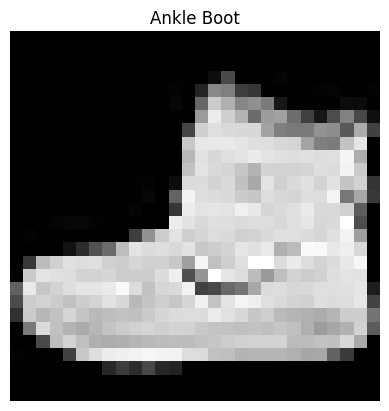

In [10]:
plt.imshow(x_train[0], cmap="gray")
plt.title(class_names[y_train[0]])
plt.axis(False)
plt.show()

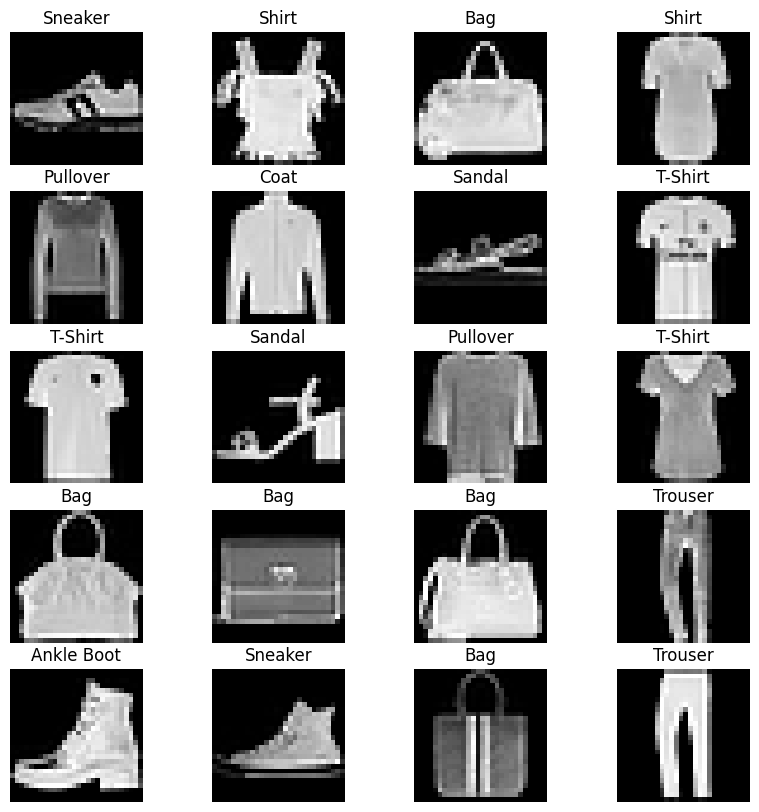

In [14]:
indices = np.random.randint(0,60000,20)

plt.figure(figsize=(10,10))
for i in range(len(indices)):
  plt.subplot(5,4,i+1)
  plt.imshow(x_train[indices[i]], cmap="gray")
  plt.title(class_names[y_train[indices[i]]])
  plt.axis(False)
plt.show()

In [15]:
# normalization of images
x_train = x_train / 255.
x_test = x_test / 255.

In [16]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)), # we flatten the images so that it becomes [28*28]
    Dense(128, activation="relu"), # hidden layer that contains 128 neurons
    Dense(10) # output layer that contains 10 neurons
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy','precision','recall'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4986 - accuracy: 0.8249 - val_loss: 0.4289 - val_accuracy: 0.8489
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8645 - val_loss: 0.4095 - val_accuracy: 0.8547
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.8776 - val_loss: 0.3686 - val_accuracy: 0.8675
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3103 - accuracy: 0.8865 - val_loss: 0.3946 - val_accuracy: 0.8568
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.8914 - val_loss: 0.3525 - val_accuracy: 0.8718
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2792 - accuracy: 0.8953 - val_loss: 0.3442 - val_accuracy: 0.8766
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.8993 - val_loss: 0.3415 - val_accuracy:

In [21]:
model.predict(x_test[100].reshape(1,28,28))

1/1 [==============================] - 0s 49ms/step


array([[ -2.840575 ,  -5.5602326,  -4.8264313,   5.0981026,  -7.1904135,
         -6.0444384,  -2.673203 , -15.362861 ,  -5.954588 , -10.156867 ]],
      dtype=float32)

In [22]:
np.argmax(model.predict(x_test[100].reshape(1,28,28)))

1/1 [==============================] - 0s 91ms/step


3

In [23]:
class_names[3]

'Dress'

In [25]:
y_test[100]

3

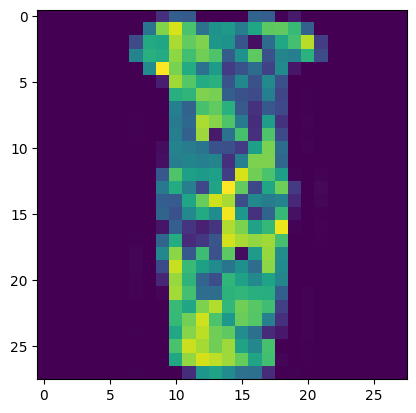

In [24]:
plt.imshow(x_test[100])